# SQL Magic Commands with SQLite in a Notebook

SQL from a notebooks, using magic commands to query a *sqllite3* database.

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

This notebook introduced some of the magic commands used to easily query a SQLite database with [sqlite3](https://docs.python.org/3.4/library/sqlite3.html). SQLite databases can be easily manipulated with open source tools such as [SQLite Manager](https://addons.mozilla.org/fr/firefox/addon/sqlite-manager/) (add-on for [firefox](https://www.mozilla.org/)) or [SQLiteSpy](http://www.yunqa.de/delphi/doku.php/products/sqlitespy/index) (only on Windows). However, it is very convenient to put the results of a SQL query into a [DataFrame](http://pandas.pydata.org/pandas-docs/dev/generated/pandas.DataFrame.html). That what's this notebook is about.

Let's start by importing some data.

In [ ]:
import pyensae
%load_ext pyensae
pyensae.download_data("velib_vanves.zip", website = "xd")

['.\\velib_vanves.txt']

In [ ]:
import os
if os.path.exists("notebook_example.db3"):
    os.remove("notebook_example.db3")

We connect to the database:

In [ ]:
%SQL_connect notebook_example.db3

The database is empty so the table list should be empty:

In [ ]:
%SQL_tables

[]

So we import a flat file (TSV format only) into the database.

In [ ]:
%SQL_import_tsv -t velib velib_vanves.txt

9461

We check there is one more table:

In [ ]:
%SQL_tables

['velib']

We get the schema of the database:

In [ ]:
%SQL_schema velib

{0: ('address', str),
 1: ('available_bike_stands', int),
 2: ('available_bikes', int),
 3: ('banking', int),
 4: ('bike_stands', int),
 5: ('bonus', int),
 6: ('contract_name', str),
 7: ('last_update', str),
 8: ('lat', str),
 9: ('lng', str),
 10: ('name', str),
 11: ('number', int),
 12: ('status', str),
 13: ('idr', int)}

And we execute the first query:

In [ ]:
%%SQL 
SELECT MAX(available_bike_stands +available_bikes) FROM velib

,MAX(available_bike_stands +available_bikes)
0,71


Or another in one row:

In [ ]:
%SQL -q "SELECT COUNT(*) FROM velib"

,COUNT(*)
0,9461


We want to draw a random sample out of this table. We ask the database to recognize the following python function (its name cannot contain ``'_'``):

In [ ]:
import random
def arandomfunction():
    return random.randint(1,100)
%SQL_add_function arandomfunction

We then execute the following query. Because the first line contains a identifier, the query will only display the shape of the results dataframe and not its content which will be stored in ``df``:

In [ ]:
%%SQL --df=df
SELECT * FROM (
    SELECT *,arandomfunction() AS rnd FROM velib)
    WHERE rnd==1

,address,available_bike_stands,available_bikes,banking,bike_stands,bonus,contract_name,last_update,lat,lng,name,number,status,idr,rnd
0,112 RUE VERCINGETORIX - 75014 PARIS,66,1,0,67,0,Paris,15/07/2013 16:40,"48,83425925","2,313391647",14029 - GERGOVIE VERCINGETORIX,14029,OPEN,25249,58
1,112 RUE VERCINGETORIX - 75014 PARIS,53,14,0,67,0,Paris,15/07/2013 22:20,"48,83425925","2,313391647",14029 - GERGOVIE VERCINGETORIX,14029,OPEN,108821,76
2,112 RUE VERCINGETORIX - 75014 PARIS,61,6,0,67,0,Paris,16/07/2013 13:50,"48,83425925","2,313391647",14029 - GERGOVIE VERCINGETORIX,14029,OPEN,337415,17
3,112 RUE VERCINGETORIX - 75014 PARIS,61,6,0,67,0,Paris,16/07/2013 14:15,"48,83425925","2,313391647",14029 - GERGOVIE VERCINGETORIX,14029,OPEN,343560,60
4,112 RUE VERCINGETORIX - 75014 PARIS,61,6,0,67,0,Paris,17/07/2013 04:05,"48,83425925","2,313391647",14029 - GERGOVIE VERCINGETORIX,14029,OPEN,547574,20
5,112 RUE VERCINGETORIX - 75014 PARIS,61,6,0,67,0,Paris,17/07/2013 14:10,"48,83425925","2,313391647",14029 - GERGOVIE VERCINGETORIX,14029,OPEN,696283,10
6,112 RUE VERCINGETORIX - 75014 PARIS,61,6,0,67,0,Paris,18/07/2013 02:05,"48,83425925","2,313391647",14029 - GERGOVIE VERCINGETORIX,14029,OPEN,872030,89
7,112 RUE VERCINGETORIX - 75014 PARIS,61,6,0,67,0,Paris,18/07/2013 03:30,"48,83425925","2,313391647",14029 - GERGOVIE VERCINGETORIX,14029,OPEN,892923,8
8,112 RUE VERCINGETORIX - 75014 PARIS,61,6,0,67,0,Paris,18/07/2013 03:40,"48,83425925","2,313391647",14029 - GERGOVIE VERCINGETORIX,14029,OPEN,895381,42
9,112 RUE VERCINGETORIX - 75014 PARIS,61,6,0,67,0,Paris,18/07/2013 07:45,"48,83425925","2,313391647",14029 - GERGOVIE VERCINGETORIX,14029,OPEN,955602,15


We look at the head:

In [ ]:
df.head()

,address,available_bike_stands,available_bikes,banking,bike_stands,bonus,contract_name,last_update,lat,lng,name,number,status,idr,rnd
0,112 RUE VERCINGETORIX - 75014 PARIS,66,1,0,67,0,Paris,15/07/2013 16:40,"48,83425925","2,313391647",14029 - GERGOVIE VERCINGETORIX,14029,OPEN,25249,58
1,112 RUE VERCINGETORIX - 75014 PARIS,53,14,0,67,0,Paris,15/07/2013 22:20,"48,83425925","2,313391647",14029 - GERGOVIE VERCINGETORIX,14029,OPEN,108821,76
2,112 RUE VERCINGETORIX - 75014 PARIS,61,6,0,67,0,Paris,16/07/2013 13:50,"48,83425925","2,313391647",14029 - GERGOVIE VERCINGETORIX,14029,OPEN,337415,17
3,112 RUE VERCINGETORIX - 75014 PARIS,61,6,0,67,0,Paris,16/07/2013 14:15,"48,83425925","2,313391647",14029 - GERGOVIE VERCINGETORIX,14029,OPEN,343560,60
4,112 RUE VERCINGETORIX - 75014 PARIS,61,6,0,67,0,Paris,17/07/2013 04:05,"48,83425925","2,313391647",14029 - GERGOVIE VERCINGETORIX,14029,OPEN,547574,20


If you into column ``rnd``, you can see that it does not contain the value if was filtered on. It is probably because the python function is evaluated twice. We add this new dataframe to the database:

In [ ]:
%SQL_import_df -t sample df

86

We check it is part the list of tables:

In [ ]:
%SQL_tables

['sample', 'velib']

We do some more queries:

In [ ]:
%%SQL

SELECT insample, COUNT(*) AS nb FROM (
    SELECT velib.*, sample.idr AS insample 
    FROM velib OUTER JOIN sample
    ON velib.idr == sample.idr
)

unable to execute a SQL request (1)(file notebook_example.db3)
SELECT insample, COUNT(*) AS nb FROM (
    SELECT velib.*, sample.idr AS insample 
    FROM velib OUTER JOIN sample
    ON velib.idr == sample.idr
)
RIGHT and FULL OUTER JOINs are not currently supported
'SELECT insample, COUNT(*) AS nb FROM (
    SELECT velib.*, sample.idr AS insample 
    FROM velib OUTER JOIN sample
    ON velib.idr == sample.idr
)'


We fix it:

In [ ]:
%%SQL

SELECT insample, COUNT(*) AS nb FROM (
    SELECT velib.idr, sample.idr is not null insample
    FROM velib LEFT OUTER JOIN sample
    ON velib.idr == sample.idr
) GROUP BY insample

,insample,nb
0,0,9375
1,1,86


Autocompletion also works when the prefix is ``DB.CC.``:

In [ ]:
%%SQL --df=dfo
SELECT DB.CC.velib.available_bike_stands, COUNT(*) 
FROM DB.CC.velib 
GROUP BY DB.CC.velib.available_bike_stands

,available_bike_stands,COUNT(*)
0,4,60
1,5,7
2,6,7
3,7,1
4,8,1
5,9,4
6,10,37
7,11,62
8,12,53
9,13,27


In [ ]:
dfo.shape

(64, 2)

The autocompletion looks like:

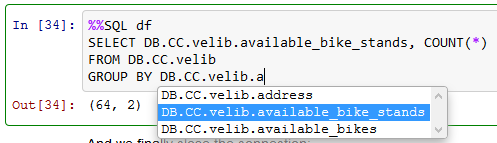

In [ ]:
from pyquickhelper.helpgen import NbImage
NbImage("dbcc.png")

We finally draw a graph:

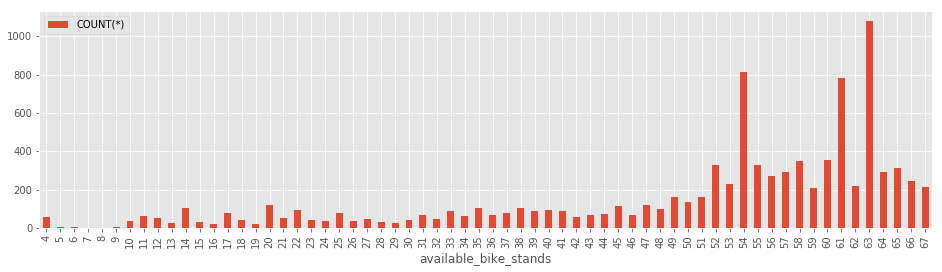

In [ ]:
dfo.plot(x="available_bike_stands", y="COUNT(*)", kind="bar", figsize=(16,4))

And we finally close the connection:

In [ ]:
%SQL_close

**END**